In [1]:
import platform
import os

system = platform.system().lower().strip()
if system in ['darwin', 'windows']:
    path_root = '.'
elif system == 'linux':
    from google.colab import drive
    drive.mount('/content/drive')

    path_root = './drive/MyDrive/code/03.crawler/00.Tools'
else:
    print('fuck')

path_root

'.'

In [2]:
from openpyxl import load_workbook
from openpyxl.utils import get_column_letter

# = = =  = = =  = = =

import json

# = = =  = = =  = = =

import requests

import sys
sys.path.append('./')
from crawler_configuration import get_header, get_proxy

# = = =  = = =  = = =

from PIL import Image
from io import BytesIO

In [3]:
directory_in = os.path.join(path_root, './crawler')
list_file = [file for file in sorted(list(os.walk(directory_in))[0][2]) if file not in ['0.null.txt', '.DS_Store'] and os.path.isfile(os.path.join(directory_in, file))]
file = list_file[0]

file

'3.part.xlsx'

In [4]:
print('Data Loading...')
wb = load_workbook(os.path.join(directory_in, file))
ws = wb.worksheets[0]
print('Loading Done !')
print()

for column in range(1, ws.max_column + 1):
    if ws.cell(1, column).value == 'Json_Src':
        column_src = column

count_remain = ws.max_row - 1

print(f'总数量：{count_remain}')
print()

column_src, get_column_letter(column_src)

Data Loading...
Loading Done !

总数量：100



(52, 'AZ')

In [5]:
crawler_status, crawler_index = False, 2

crawler_status, crawler_index

(False, 2)

In [6]:
url_request = '' if not ws.cell(crawler_index, column_src).value or ws.cell(crawler_index, column_src).value == '' else json.loads(ws.cell(crawler_index, column_src).value).get('0', '')

url_request

'https://m.media-amazon.com/images/I/71wmhb446HL._AC_SL1500_.jpg'

In [7]:
url_request == ''

False

In [8]:
import time

crawler_retry = 0
while True:
    crawler_retry += 1
    print(crawler_retry)
    try:
        resp = requests.get(url_request,
                            headers=get_header(),
                            proxies=get_proxy(),
                            timeout=(5, 15))

        if resp.status_code == 200:
            break
    except KeyboardInterrupt:
        break
    except:
        time.sleep(3)
        continue

resp

1


<Response [200]>

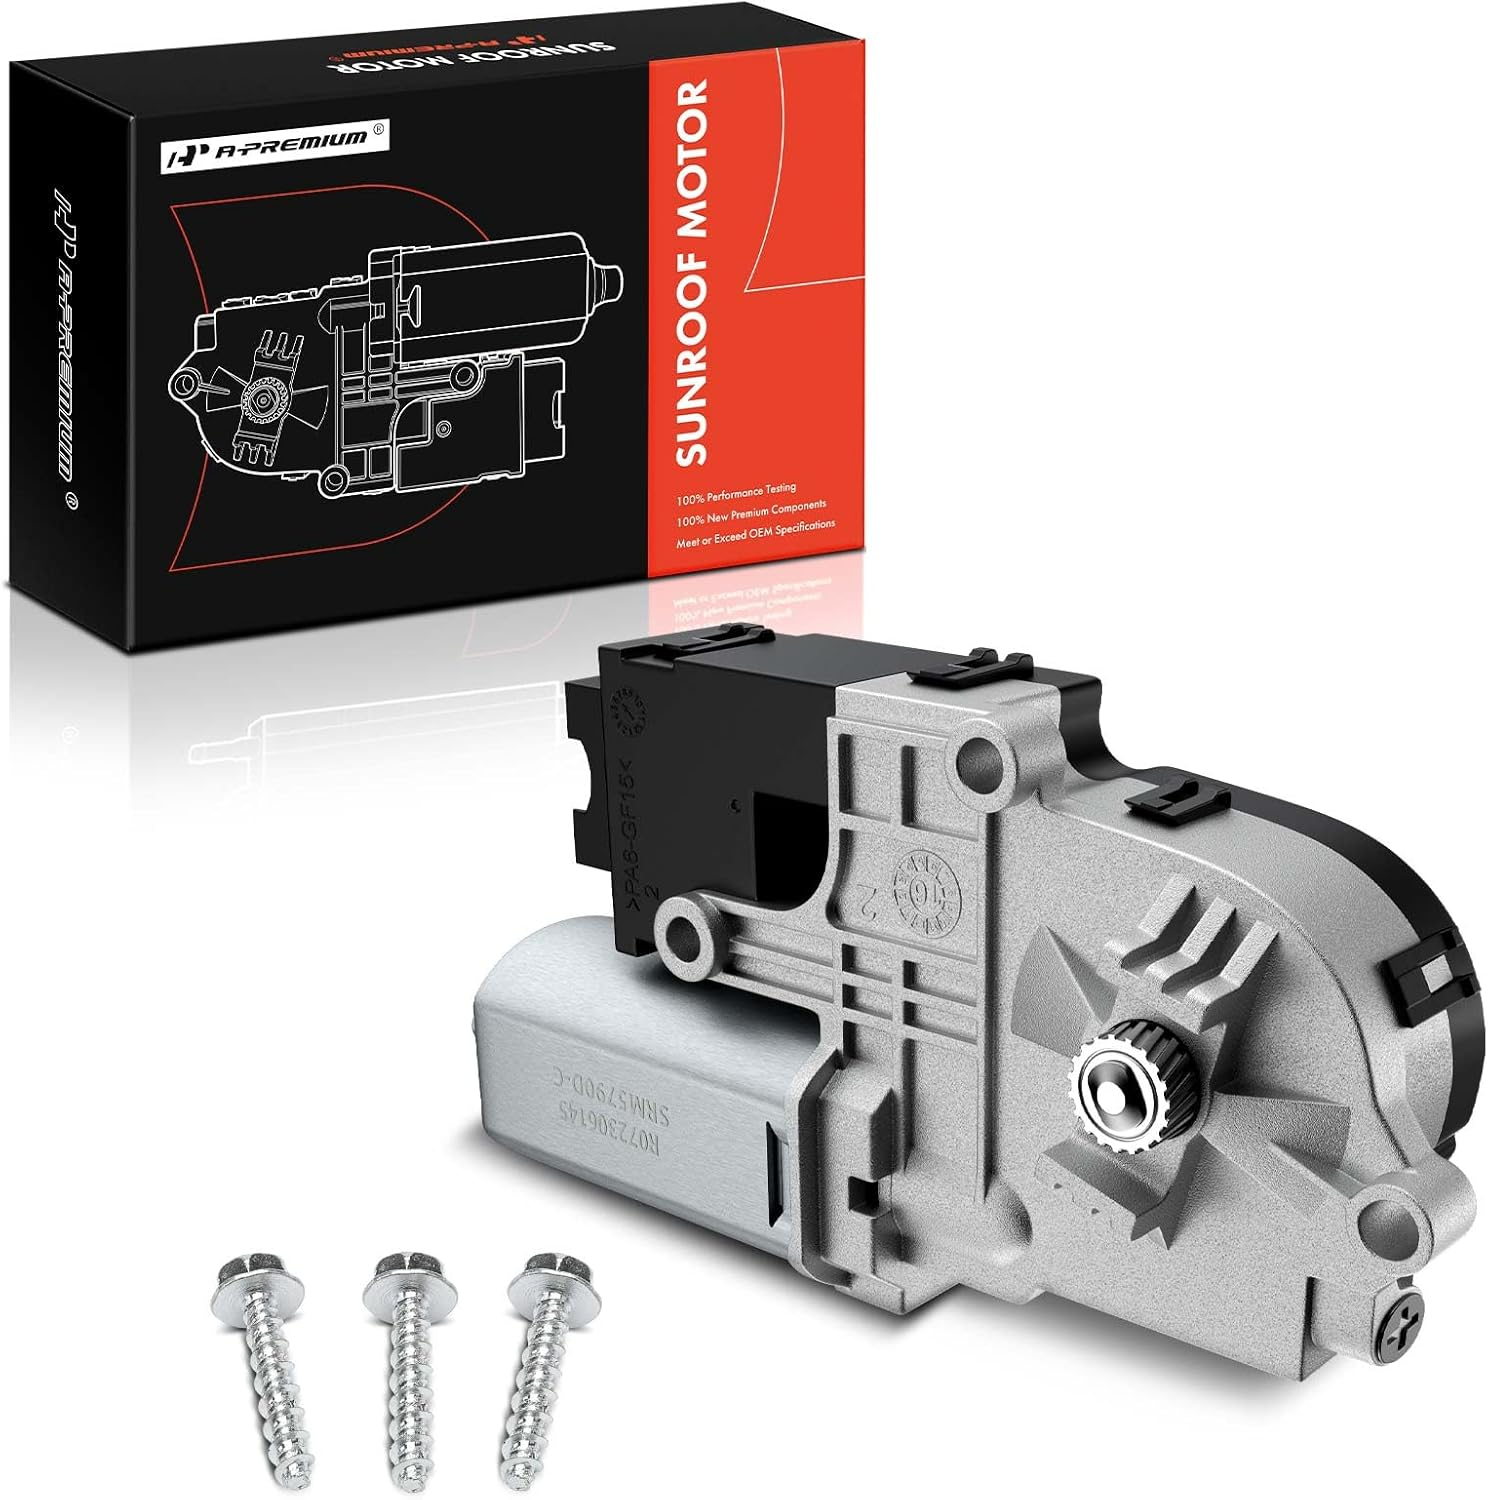

In [9]:
image = Image.open(BytesIO(resp.content)).convert('RGB')

image

In [10]:
buffer = BytesIO()
image.save(buffer, format="PNG")
buffer.seek(0)

with open(os.path.join(path_root, './test_picture.png'), 'wb') as pic:
    pic.write(buffer.getvalue())

In [11]:
print('Done ~')

Done ~
